In [191]:
import requests
import json

# Channel names
channels = ['Technology', 'TV & Film', 'Food & Cooking', "Literature"]

# URLs of transcripts in scope
urls = ['https://a.4cdn.org/g/catalog.json',
        'https://a.4cdn.org/tv/catalog.json',
        'https://a.4cdn.org/ck/catalog.json',
        'https://a.4cdn.org/lit/catalog.json']

# Initialize raw data list
data = [[] for i in range(len(channels))]

# Pull json data from URLs
for i, c in enumerate(urls):
    response = requests.get(c)
    response_text = response.text
    data[i] = json.loads(response_text)

# Initialize comment list for each channel
comments = [[] for i in range(len(channels))]

# Parse data for all comments and replies
# Each comments list element has the comments for each channel
for i in range(len(data)):
    for thread in data[i][0]["threads"]:
        if "com" in thread:
            comments[i].append(thread["com"])
        if "last_replies" in thread:
            for reply in thread["last_replies"]:
                if "com" in reply:
                    comments[i].append(reply["com"])

data_organized = dict()

#might be able to delete this loop
#for channel in channels:
#    data_organized[channel] = []

#might be able to just use this 
#converts the list of lists into a dictionary
for i, c in enumerate(channels):
    data_organized[c] = comments[i]
    

In [192]:
#convert the data to key: channel, string: comments format
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text


data_combined = {key: [combine_text(value)] for (key, value) in data_organized.items()}

In [195]:
# rearrange the data into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['comments']
data_df = data_df.sort_index()
data_df

,comments
Food & Cooking,"Just tried these beauties for the first time... Prophet Muhammad knew what was up <a href=""#p15967395"" class=""quotelink"">&gt;&gt;15967395</a><br>b..."
Literature,"/lit/ is for the discussion of literature, specifically books (fiction &amp; non-fiction), short stories, poetry, creative writing, etc. If you wa..."
TV & Film,"As usual, I&#039;ll <s>Barry B. Benson</s> the bigger man. A truce, Bruce. <a href=""#p149750353"" class=""quotelink"">&gt;&gt;149750353</a><br><span ..."
Technology,This board is for the discussion of technology and related topics.<br> <br> \nReminder that instigating OR participating in flame/brand wars will ...


In [196]:
data_df.comments.loc['Technology']

'This board is for the discussion of technology and related topics.<br> <br> \nReminder that instigating OR participating in flame/brand wars will result in a ban.<br>\nTech support threads should be posted to <a href="/wsr/" class="quotelink"><a href="//boards.4channel.org/wsr/" class="quotelink">&gt;&gt;&gt;/wsr/</a></a><br> \nCryptocurrency discussion belongs on <a href="/biz/" class="quotelink"><a href="//boards.4channel.org/biz/" class="quotelink">&gt;&gt;&gt;/biz/</a></a><br> <br> To use the Code tag, book-end your body of code with: [co\xadde] and [/co\xadde]<br> <br> The /g/ Wiki: <a href="https://wiki.installgentoo.com/">https://wiki.installgentoo.com/</a> How does anyone use this piece of shit? why yes i do, what gave it away? <a href="#p81217618" class="quotelink">&gt;&gt;81217618</a><br>Memory is just memory. When you write in any other language you call built in functions that manipulate memory so that it does what you want. Now you just have to just do it yourself. Constr

In [197]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text(x)

# Let's take a look at the cleaned text
data_clean = pd.DataFrame(data_df.comments.apply(round1))
data_clean

,comments
Food & Cooking,just tried these beauties for the first time prophet muhammad knew what was up a anon sticking it to the vegans a classquotegtdates goodspanbr...
Literature,lit is for the discussion of literature specifically books fiction amp nonfiction short stories poetry creative writing etc if you want to discuss...
TV & Film,as usual sbarry b bensons the bigger man a truce bruce a classquotegtfocus the fucking camera you not gonna like army of the dead in that case...
Technology,this board is for the discussion of technology and related topicsbr br reminder that instigating or participating in flamebrand wars will result i...


In [198]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.comments)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,able,aboutconfig,absolute,absolutely,absolutespanbrholy,absorbing,accelerated,accelerationspanbrspan,accept,acceptable,...,कर,गन,जग,टम,दय,नक,पक,मह,रप,हतर
Food & Cooking,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Literature,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TV & Film,0,0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Technology,1,1,0,2,0,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [199]:
# Find the top 30 words said by each comedian
data = data_dtm.transpose()


top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Food & Cooking': [('just', 9),
  ('like', 8),
  ('vitamin', 6),
  ('bad', 6),
  ('fallout', 6),
  ('cookbook', 5),
  ('make', 5),
  ('mix', 5),
  ('good', 5),
  ('flour', 4),
  ('chicken', 4),
  ('fucking', 4),
  ('think', 4),
  ('knew', 4),
  ('gravy', 4),
  ('american', 4),
  ('unique', 4),
  ('sweet', 4),
  ('old', 3),
  ('taste', 3),
  ('sausage', 3),
  ('water', 3),
  ('thing', 3),
  ('week', 3),
  ('anon', 3),
  ('world', 3),
  ('want', 3),
  ('day', 3),
  ('fuck', 3),
  ('really', 3)],
 'Literature': [('make', 10),
  ('read', 10),
  ('like', 8),
  ('lit', 8),
  ('classquotegt', 8),
  ('books', 7),
  ('book', 7),
  ('write', 7),
  ('people', 7),
  ('just', 7),
  ('fucking', 6),
  ('want', 6),
  ('ask', 6),
  ('reading', 6),
  ('story', 5),
  ('interests', 5),
  ('ibn', 5),
  ('shit', 5),
  ('time', 5),
  ('class', 5),
  ('said', 4),
  ('talking', 4),
  ('classquotegtthe', 4),
  ('writing', 4),
  ('good', 4),
  ('philosophy', 4),
  ('place', 4),
  ('english', 4),
  ('language', 

In [201]:
# Print the top 15 words said by each comedian
for channel, top_words in top_dict.items():
    print(channel)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Food & Cooking
just, like, vitamin, bad, fallout, cookbook, make, mix, good, flour, chicken, fucking, think, knew
---
Literature
make, read, like, lit, classquotegt, books, book, write, people, just, fucking, want, ask, reading
---
TV & Film
just, film, like, tv, entertainment, good, opera, rock, movie, movies, games, action, video, going
---
Technology
use, just, emacs, want, need, shit, spana, work, project, language, code, run, server, classquotegt
---


In [202]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()



[('just', 4),
 ('like', 4),
 ('make', 3),
 ('good', 3),
 ('want', 3),
 ('shit', 3),
 ('fucking', 2),
 ('think', 2),
 ('world', 2),
 ('classquotegt', 2),
 ('people', 2),
 ('time', 2),
 ('said', 2),
 ('classquotegtthe', 2),
 ('writing', 2),
 ('language', 2),
 ('vitamin', 1),
 ('bad', 1),
 ('fallout', 1),
 ('cookbook', 1),
 ('mix', 1),
 ('flour', 1),
 ('chicken', 1),
 ('knew', 1),
 ('gravy', 1),
 ('american', 1),
 ('unique', 1),
 ('sweet', 1),
 ('old', 1),
 ('taste', 1),
 ('sausage', 1),
 ('water', 1),
 ('thing', 1),
 ('week', 1),
 ('anon', 1),
 ('day', 1),
 ('fuck', 1),
 ('really', 1),
 ('read', 1),
 ('lit', 1),
 ('books', 1),
 ('book', 1),
 ('write', 1),
 ('ask', 1),
 ('reading', 1),
 ('story', 1),
 ('interests', 1),
 ('ibn', 1),
 ('class', 1),
 ('talking', 1),
 ('philosophy', 1),
 ('place', 1),
 ('english', 1),
 ('person', 1),
 ('film', 1),
 ('tv', 1),
 ('entertainment', 1),
 ('opera', 1),
 ('rock', 1),
 ('movie', 1),
 ('movies', 1),
 ('games', 1),
 ('action', 1),
 ('video', 1),
 ('goi

In [203]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 1]

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.comments)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index


In [204]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

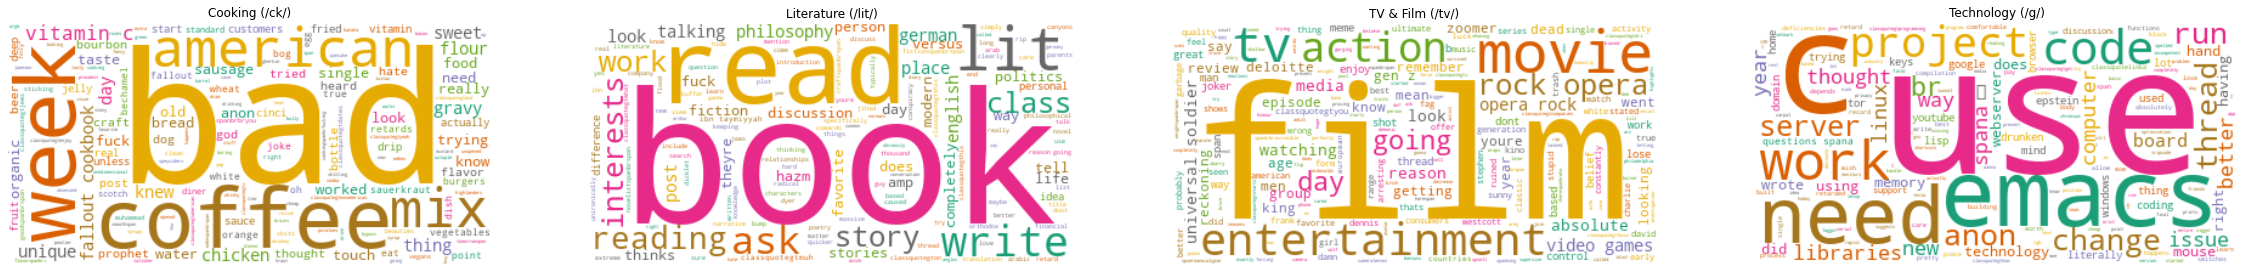

In [208]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [40, 40]

channel_names = ["Cooking (/ck/)", "Literature (/lit/)", "TV & Film (/tv/)", "Technology (/g/)"]

# Create subplots for each comedian
for index, channel in enumerate(data.columns):
    wc.generate(data_clean.comments[channel])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(channel_names[index])
    
plt.show()

In [209]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(channels, unique_list)), columns=['channel', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,channel,unique_words
0,Technology,496
2,Food & Cooking,622
1,TV & Film,732
3,Literature,859


In [210]:
# Let's plot our findings
import numpy as np

# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity



,f_word,s_word
Food & Cooking,7,2
Literature,9,5
TV & Film,3,4
Technology,2,7
